In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA

def plot_decision_boundary(model, X, y,target_names,model_name):
    
    plt.figure(figsize=(12,6))
    colors = "bryg"
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
    plt.axis('tight')
  
    for i, color in zip(model.classes_, colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                 cmap=plt.cm.Paired,edgecolor='black', s=50, vmin=-.2, vmax=1.2,)
        
    plt.title("Decision boundary of " + model_name)
    plt.axis('tight')
    plt.xlabel('most important feature1')
    plt.ylabel('most important feature2')
    
    plt.legend()
    plt.show()

def evaluateModel(y_true,y_pred,target_names):
    for j, metrics in enumerate([precision_score,recall_score,f1_score]):
        print(metrics.__name__,':',metrics(y_true,y_pred,labels=None, pos_label=1, average='weighted'))
    print("classification report :")
    print(classification_report(y_true ,y_pred, target_names = target_names))
    
def confusion_matrix_details(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print("true negatives:", cm[0,0])
    print("false positives:", cm[0,1])
    print("false negatives:", cm[1,0])
    print("true positives:", cm[1,1])

data = pd.read_csv('2017-18_officialBoxScore.csv')
data

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,BOS,East,Atlantic,Away,Loss,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Smith,Michael,BOS,East,Atlantic,Away,Loss,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
2,2017-10-17,08:00,Regular,McCutchen,Monty,BOS,East,Atlantic,Away,Loss,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
3,2017-10-17,08:00,Regular,Forte,Brian,CLE,East,Central,Home,Win,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
4,2017-10-17,08:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7373,2018-04-11,10:30,Regular,Orr,J.T.,HOU,West,Southwest,Away,Loss,...,65.8333,104.3633,90.2307,14.1326,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047
7374,2018-04-11,10:30,Regular,Foster,Scott,HOU,West,Southwest,Away,Loss,...,65.8333,104.3633,90.2307,14.1326,0.4471,18.0624,2.0000,54.5455,91.9864,91.6047
7375,2018-04-11,10:30,Regular,Tiven,Josh,SAC,West,Pacific,Home,Win,...,34.8548,90.2307,104.3633,-14.1326,0.3523,9.7969,0.7857,14.2857,91.9864,91.9864
7376,2018-04-11,10:30,Regular,Orr,J.T.,SAC,West,Pacific,Home,Win,...,34.8548,90.2307,104.3633,-14.1326,0.3523,9.7969,0.7857,14.2857,91.9864,91.9864


PREPARE DATA

AxesSubplot(0.125,0.125;0.62x0.755)


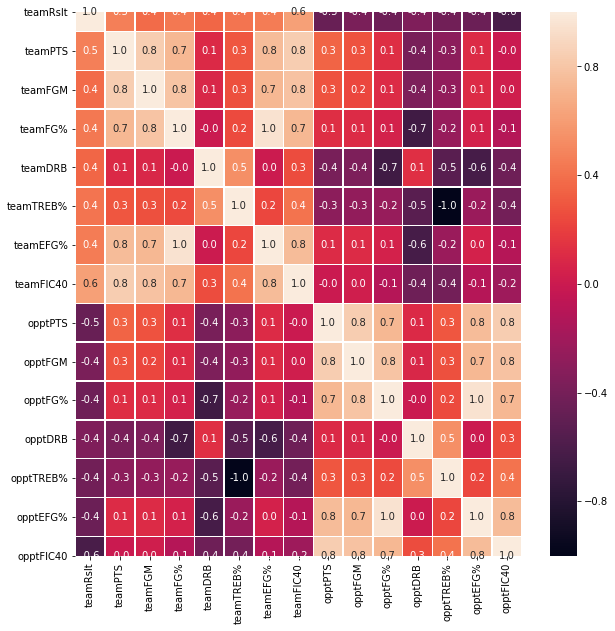

In [2]:
data = pd.read_csv('2017-18_officialBoxScore.csv')
dropCalculatedColumns = ["teamASST%","teamSTL%", "teamBLK%", "teamBLKR", "teamPPS", "teamOrtg",
                         "teamDrtg", "teamEDiff", "teamAST/TO", "teamSTL/TO",
                         "opptASST%", "opptSTL%", "opptBLK%", "opptBLKR", "opptPPS", "opptOrtg",
                         "opptDrtg", "opptEDiff", "opptAST/TO", "opptSTL/TO", "opptLoc", "opptRslt","pace",
                         "seasTyp" , "teamPTS8", "opptPTS8" # last 3 because they have only 1 unique value
                        ]

divisions = ['Atlantic', 'Central', 'Northwest', 'Pacific', 'Southeast', 'Southwest']

data = data.drop(dropCalculatedColumns, axis = 1)

gmDateHour = [int(x[0:2]) for x in data['gmTime']]
gmDateYear = [int(x[0:4]) for x in data['gmDate']]
gmDateMonth = [int(x[5:7]) for x in data['gmDate']]

data = data.drop(['gmTime','gmDate'], axis  = 1)
data['gmDateHour'] = gmDateHour
data['gmDateYear'] = gmDateYear
data['gmDateMonth'] = gmDateMonth

labelEncoder = preprocessing.LabelEncoder()
data['teamAbbr'] = labelEncoder.fit_transform(data['teamAbbr']) + 1
data['opptAbbr'] = labelEncoder.transform(data['opptAbbr']) + 1
data['offLNm'] = labelEncoder.fit_transform(data['offLNm']) + 1
data['offFNm'] = labelEncoder.fit_transform(data['offFNm']) + 1

labelEncoder.fit(divisions)
data['teamDiv'] = labelEncoder.transform(data['teamDiv']) + 1
data['opptDiv'] = labelEncoder.transform(data['opptDiv']) + 1
data['teamRslt'] = labelEncoder.fit_transform(data['teamRslt'])

dataTeamConf = pd.get_dummies(data['teamConf'], prefix='first_team_conf_is')
dataOppConf = pd.get_dummies(data['opptConf'], prefix = 'second_team_conf_is')
dataLocation = pd.get_dummies(data['teamLoc'], prefix='is_first_team_playing')
data = data.drop(['teamConf','opptConf','teamLoc'],axis = 1) 
data = data.join(dataTeamConf)
data = data.join(dataOppConf)
data = data.join(dataLocation)

highCorrelatedColumns = ['teamPlay%', 'opptPlay%', 'teamFIC', 'opptFIC', 'teamTS%', 'opptTS%']
pickColumns = data.corrwith(data['teamRslt'])[abs(data.corrwith(data['teamRslt'])) > 0.35].index.tolist()
pickColumns = [elem for elem in pickColumns if elem not in highCorrelatedColumns]
correlatedData = data.loc[:, pickColumns]
y = correlatedData['teamRslt'].values
normalizedCorrelatedData = (correlatedData - correlatedData.mean()) / correlatedData.std()
X = normalizedCorrelatedData.drop('teamRslt', axis = 1).values
f, ax = plt.subplots(figsize=(10, 10))
#print(pickColumns)
print(sns.heatmap(normalizedCorrelatedData.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
KNN = KNeighborsClassifier(n_jobs = -1)
target_names = ['Lose','Win']
parameters = {'n_neighbors':[5, 7, 10, 15, 20, 50],
              'algorithm':  ['auto', 'ball_tree', 'kd_tree'],
              'p' : [1, 2]
             }
model = GridSearchCV(KNN,parameters)
model.fit(X_train,y_train)
print('Score:',model.score(X_test,y_test))
model.best_params_

c:\users\i520921\appdata\local\continuum\anaconda3\envs\pp\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score: 0.9327009936766034


{'algorithm': 'auto', 'n_neighbors': 15, 'p': 2}

In [4]:
confusion_matrix_details(y_test,model.predict(X_test))
print()
evaluateModel(y_test,model.predict(X_test), target_names)

true negatives: 1032
false positives: 84
false negatives: 65
true positives: 1033

precision_score : 0.932837863408246
recall_score : 0.9327009936766034
f1_score : 0.9327007328168326
classification report :
              precision    recall  f1-score   support

        Lose       0.94      0.92      0.93      1116
         Win       0.92      0.94      0.93      1098

    accuracy                           0.93      2214
   macro avg       0.93      0.93      0.93      2214
weighted avg       0.93      0.93      0.93      2214



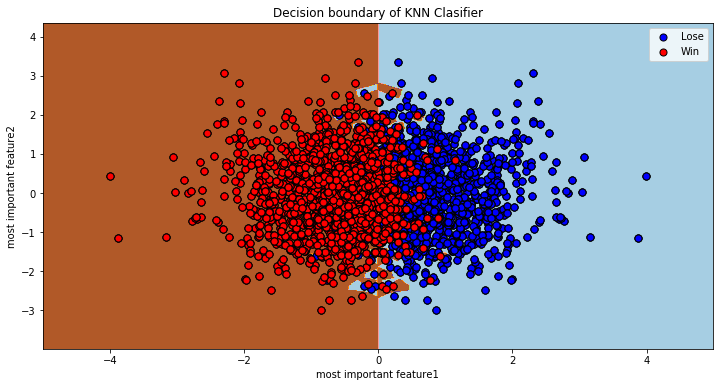

In [5]:
X_reduced = PCA(n_components=2).fit_transform(X)
X_reduced = (X_reduced - X_reduced.mean(axis = 0)) / X_reduced.std(axis =0)
model = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2)
model.fit(X_reduced,y)
plot_decision_boundary(model, X_reduced, model.predict(X_reduced),target_names,"KNN Clasifier")

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = SVC()
target_names = ['Lose','Win']
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[0.1, 1, 3, 5, 8, 10, 20], 'gamma' : ('auto','scale')}
model = GridSearchCV(model, parameters, cv = 2, verbose = 10, n_jobs = -1)
model.fit(X_train,y_train)
print(model.best_params_)
model.score(X_test,y_test)

Fitting 2 folds for each of 42 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.1s


{'C': 3, 'gamma': 'auto', 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done  70 out of  84 | elapsed:    4.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  79 out of  84 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    4.3s finished


1.0

In [7]:
confusion_matrix_details(y_test,model.predict(X_test))
print()
evaluateModel(y_test,model.predict(X_test), target_names)

true negatives: 1116
false positives: 0
false negatives: 0
true positives: 1098

precision_score : 1.0
recall_score : 1.0
f1_score : 1.0
classification report :
              precision    recall  f1-score   support

        Lose       1.00      1.00      1.00      1116
         Win       1.00      1.00      1.00      1098

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



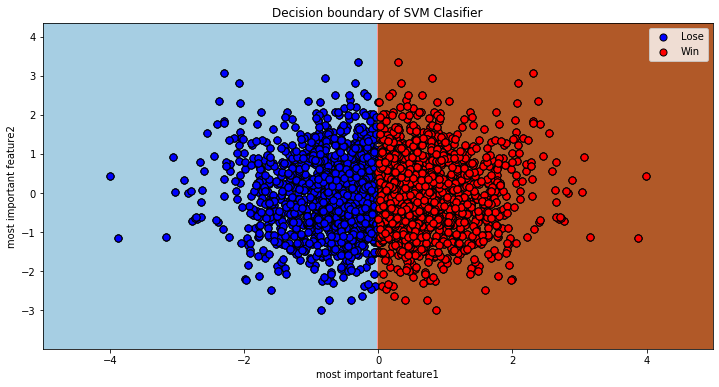

In [8]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(X)
X_reduced = (X_reduced - X_reduced.mean(axis = 0)) / X_reduced.std(axis =0)
model = SVC(kernel='linear', C = 5, gamma = 'auto')
model.fit(X_reduced,y)
plot_decision_boundary(model, X_reduced, model.predict(X_reduced),target_names,"SVM Clasifier")